# Task 1 - Prediction using Supervised Learning

### Importing the Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

### Reading the dataset

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


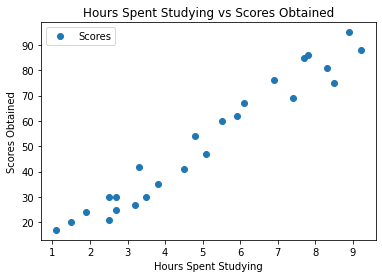

In [5]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Spent Studying vs Scores Obtained')  
plt.xlabel('Hours Spent Studying')  
plt.ylabel('Scores Obtained')  
plt.show()

<AxesSubplot:xlabel='Scores'>

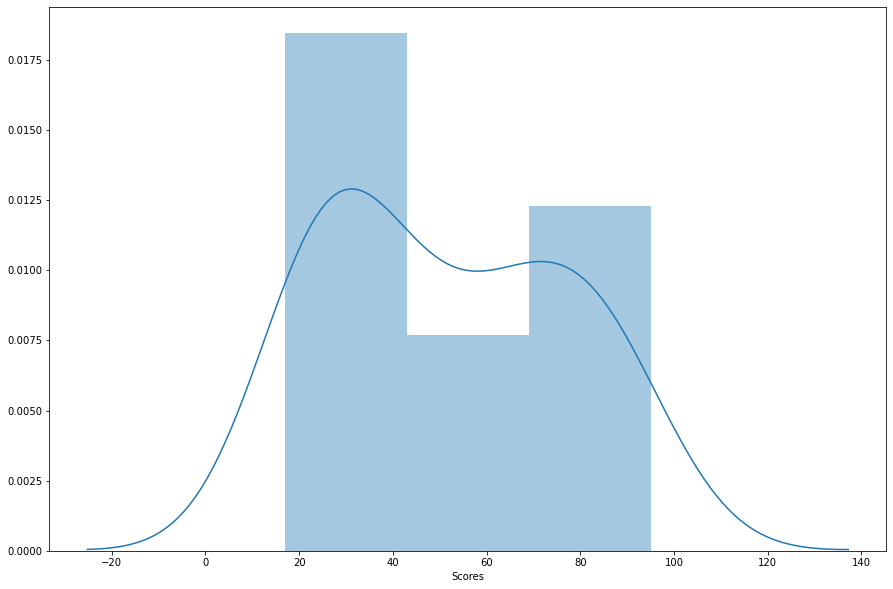

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Scores'])

In [7]:
X = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

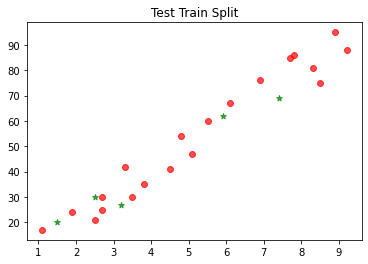

In [9]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Test Data', color='g', alpha=.7, marker='*')
plt.title('Test Train Split')  
plt.show()

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


In [12]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


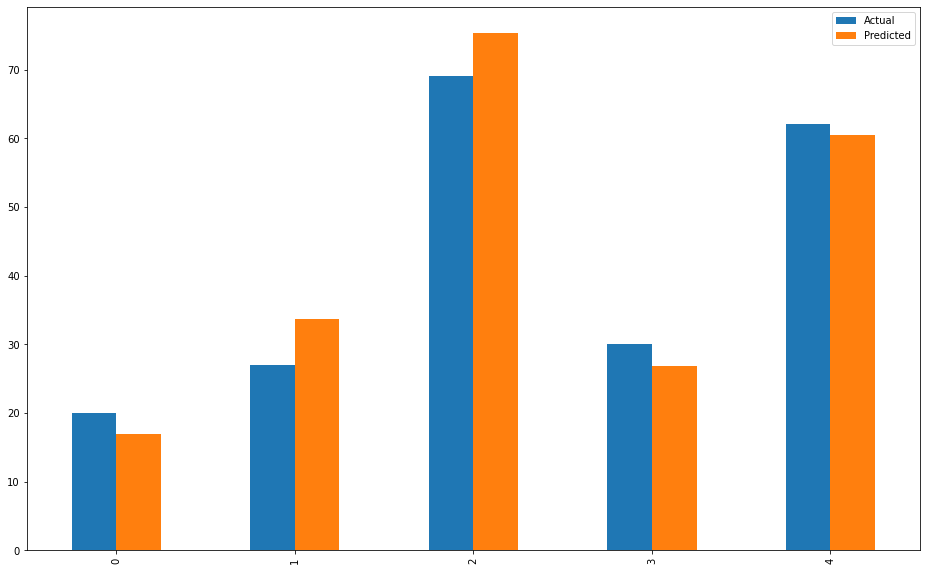

In [14]:
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.show()

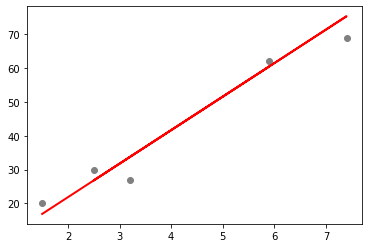

In [15]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [17]:
hours = [9.25]
hours = np.array(hours).reshape((len(hours), 1))
hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


In [18]:
print("R^2 Score: ",r2_score(y_test, y_pred))

R^2 Score:  0.9454906892105356


In [19]:
import pickle
pickle_out = open('regressor.pickle', 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()